In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("retail_sales_dataset.csv")

In [3]:
df.shape

(1000, 9)

In [4]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [6]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.drop_duplicates(inplace=True)

In [70]:
df.describe()

,Transaction ID,Date,Age,Quantity,Price per Unit,Total Amount,year,Month
count,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000,2023.002000,6.549000
min,1.000000,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000,2023.000000,1.000000
25%,250.750000,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000,2023.000000,4.000000
50%,500.500000,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000,2023.000000,6.000000
75%,750.250000,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000,2023.000000,10.000000
max,1000.000000,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000,2024.000000,12.000000
std,288.819436,NaN,13.68143,1.132734,189.681356,559.997632,0.044699,3.452755


In [11]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [6]:
df['Date'] = pd.to_datetime(df['Date'])  # Convert to datetime
df['year'] = df['Date'].dt.year  # Now we can use .dt accessor
np.unique(df['year'])

array([2023, 2024], dtype=int32)

In [7]:
# number of transaction for each year

df['year'].value_counts()

year
2023    998
2024      2
Name: count, dtype: int64

In [8]:
df['Month']= df['Date'].dt.month
df['Weekday']= df['Date'].dt.day_name()

In [9]:
df['Month_name']=df["Date"].dt.month_name()
df['Month_name'].value_counts()

Month_name
May          105
October       96
August        94
December      91
April         86
February      85
January       78
November      78
June          77
March         73
July          72
September     65
Name: count, dtype: int64

In [67]:
df.groupby('Product Category')['Total Amount'].sum()

Product Category
Beauty         143515
Clothing       155580
Electronics    156905
Name: Total Amount, dtype: int64

In [68]:
df[df['Month_name'] == 'May'].groupby('Product Category')['Total Amount'].sum()

Product Category
Beauty         12450
Clothing       17455
Electronics    23245
Name: Total Amount, dtype: int64

In [69]:
df[df['Month_name'] == 'May'].groupby('Product Category')['Quantity'].sum()

Product Category
Beauty         65
Clothing       97
Electronics    97
Name: Quantity, dtype: int64

In [54]:
df.groupby(['Product Category'], as_index=False)['Total Amount'].sum().sort_values(by='Total Amount',ascending=False)

,Product Category,Total Amount
2,Electronics,156905
1,Clothing,155580
0,Beauty,143515


<Axes: xlabel='Product Category', ylabel='Total Amount'>

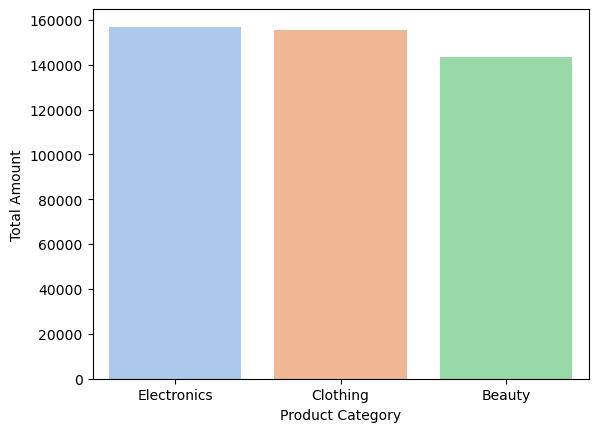

In [59]:
sales_age = df.groupby(['Product Category'], as_index=False)['Total Amount'].sum().sort_values(by='Total Amount',ascending=False)

sns.barplot(x='Product Category', y='Total Amount',
            hue='Product Category', data=sales_age,
            palette='pastel', legend=False)  

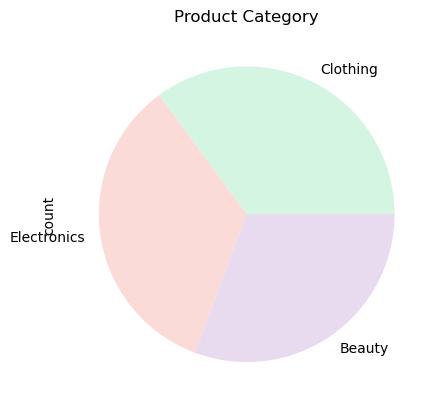

In [124]:
custom_color = ['#D5F5E3','#FADBD8','#E8DAEF']
df['Product Category'].value_counts().plot.pie(colors = custom_color)
plt.title("Product Category")
plt.show()

Text(0, 0.5, 'Total Amount')

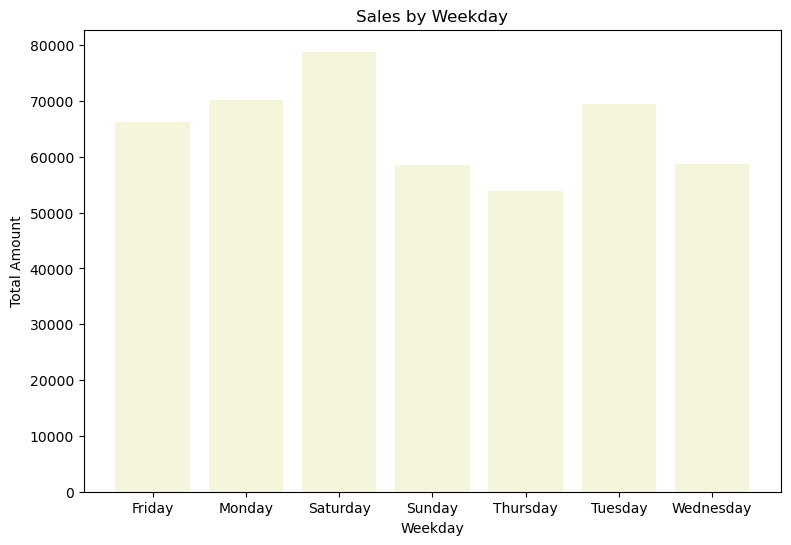

In [95]:
weekday_sales = df.groupby("Weekday")["Total Amount"].sum()
plt.figure(figsize=(9,6))
plt.bar(weekday_sales.index, weekday_sales.values, color='beige')
plt.title("Sales by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Total Amount")

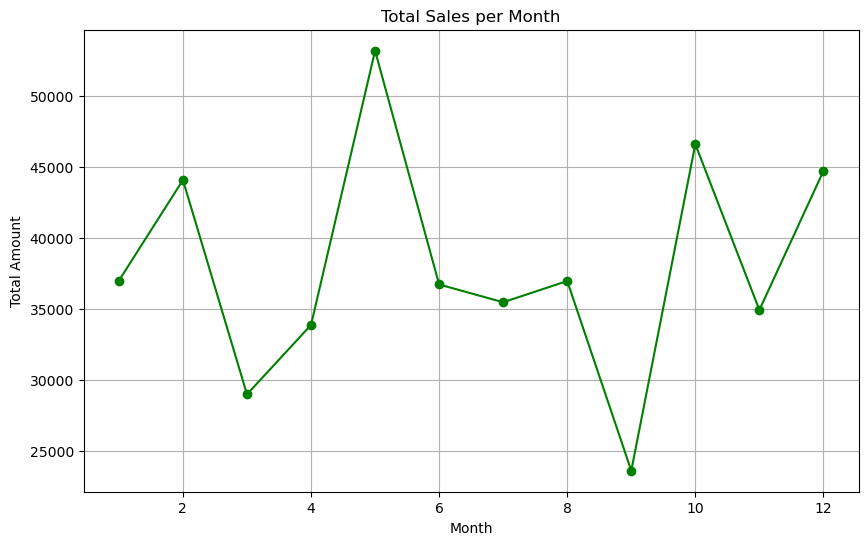

In [83]:
month_sales= df.groupby("Month")['Total Amount'].sum()   
plt.figure(figsize=(10,6))
plt.plot(month_sales.index, month_sales.values, marker='o', color='green')
plt.title("Total Sales per Month")
plt.xlabel("Month")
plt.ylabel("Total Amount")
plt.grid()

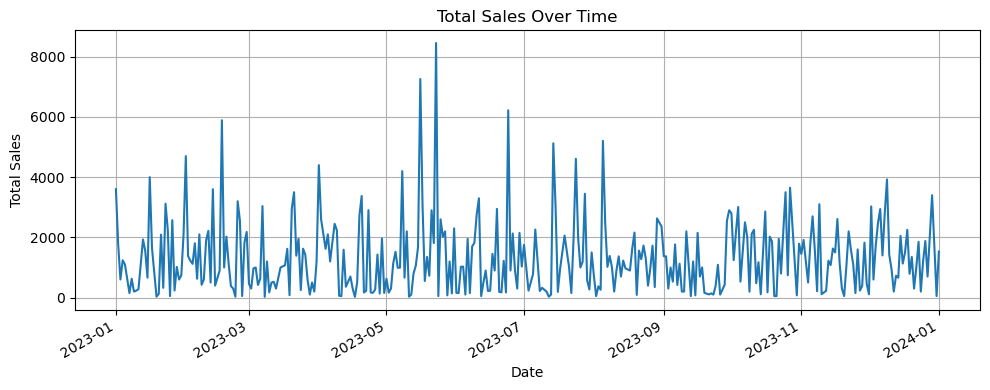

In [116]:
# Group by date and sum
sales_by_date = df.groupby('Date')['Total Amount'].sum()

plt.figure(figsize=(10, 4))
sales_by_date.plot()
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

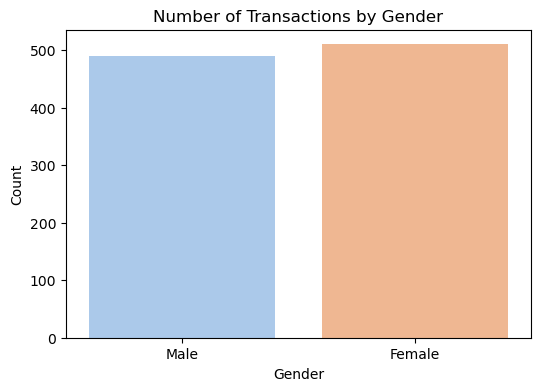

In [110]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender', hue = 'Gender', palette='pastel', legend=False)
plt.title('Number of Transactions by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

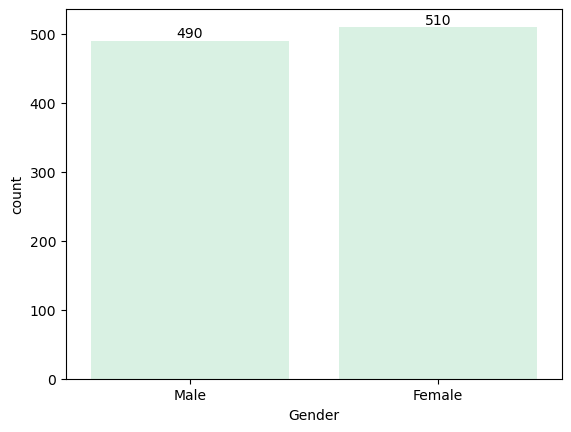

In [123]:
ax.set_title("Count per Gender")
ax = sns.countplot(x = 'Gender',data = df, color= '#D5F5E3')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

In [73]:
df.groupby(['Gender'], as_index=False)['Total Amount'].sum().sort_values(by='Total Amount',ascending=False)

,Gender,Total Amount
0,Female,232840
1,Male,223160


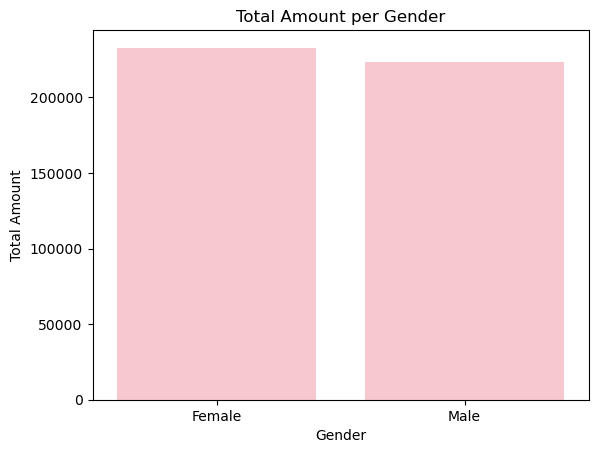

In [122]:
sales_gender = df.groupby(['Gender'], as_index=False)['Total Amount'].sum().sort_values(by='Total Amount',ascending=False)
plt.title("Total Amount per Gender")
sns.barplot(x = 'Gender', y = 'Total Amount', data = sales_gender, color= 'Pink')
plt.show()

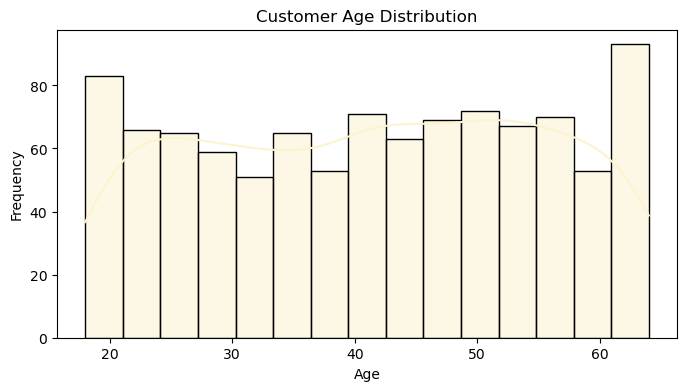

In [115]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='Age', bins=15, kde=True, color='#FCF3CF')
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [76]:
df.groupby(['Age'], as_index=False)['Total Amount'].sum().sort_values(by='Total Amount',ascending=False)

,Age,Total Amount
25,43,17970
16,34,16785
33,51,16065
1,19,14870
8,26,13980
4,22,13700
28,46,13090
3,21,12585
29,47,12505
19,37,11650


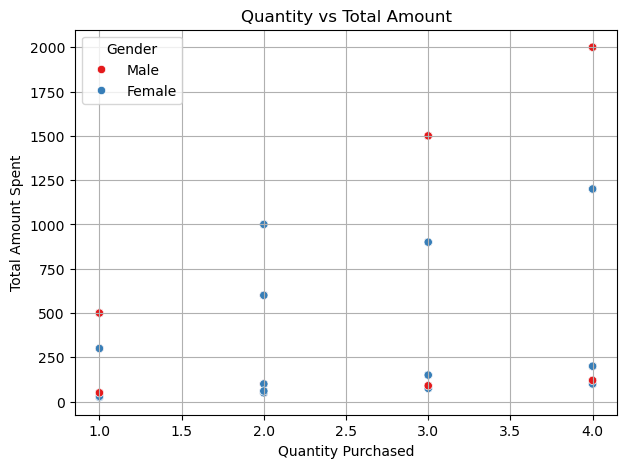

In [117]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x='Quantity', y='Total Amount', hue='Gender', palette='Set1')

plt.title('Quantity vs Total Amount')
plt.xlabel('Quantity Purchased')
plt.ylabel('Total Amount Spent')
plt.legend(title='Gender')
plt.grid(True)
plt.show()

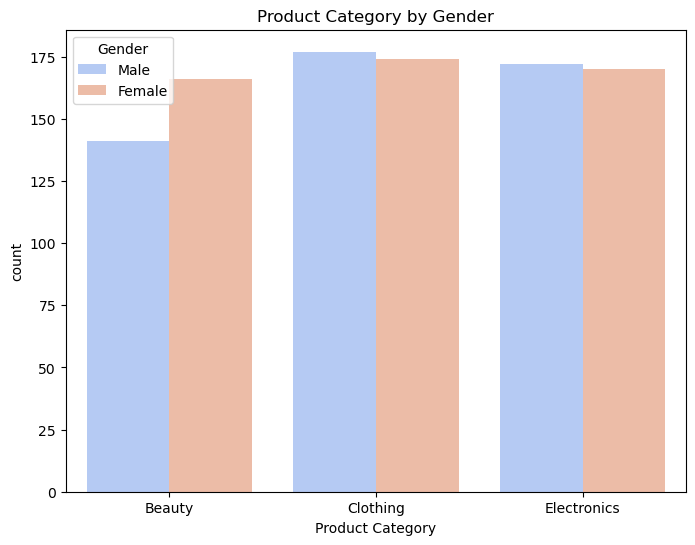

In [120]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Product Category', hue='Gender',palette='coolwarm')
plt.title("Product Category by Gender");

In [5]:
numeric_df = df.select_dtypes(include=['number'])  # This selects only numeric columns
correlation_matrix = numeric_df.corr()
print("Correlation Matrix:\n", correlation_matrix)


Correlation Matrix:
                 Transaction ID       Age  Quantity  Price per Unit  \
Transaction ID        1.000000  0.065191 -0.026623       -0.060837   
Age                   0.065191  1.000000 -0.023737       -0.038423   
Quantity             -0.026623 -0.023737  1.000000        0.017501   
Price per Unit       -0.060837 -0.038423  0.017501        1.000000   
Total Amount         -0.075034 -0.060568  0.373707        0.851925   

                Total Amount  
Transaction ID     -0.075034  
Age                -0.060568  
Quantity            0.373707  
Price per Unit      0.851925  
Total Amount        1.000000  


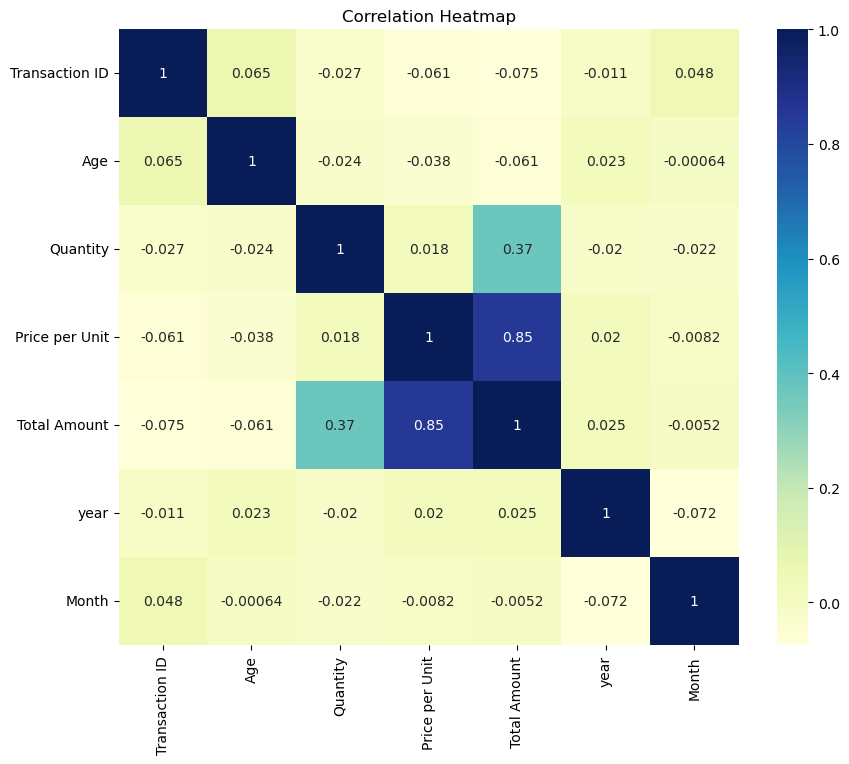

In [16]:
# Visualize correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='YlGnBu')
plt.title('Correlation Heatmap')
plt.show()

In [133]:
df['Date'] = pd.to_datetime(df['Date'])

In [134]:
## Create Spending Tier 
df['Spending Tier'] = pd.qcut(df['Total Amount'], 4, labels=['1', '2', '3', '4'])

## Create Age Group 

df['Age Group'] = pd.cut(df['Age'], bins=[17, 25, 35, 50, 70], labels=['18–25', '26–35', '36–50', '51+'])

In [135]:
df.to_csv("customer_segmentation_stars.csv", index=False)

In [136]:
df.head(10)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,year,Month,Weekday,Month_name,Spending Tier,Age Group
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,2023,11,Friday,November,3,26–35
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2023,2,Monday,February,4,26–35
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,2023,1,Friday,January,1,36–50
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,2023,5,Sunday,May,3,36–50
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,2023,5,Saturday,May,2,26–35
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30,2023,4,Tuesday,April,1,36–50
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50,2023,3,Monday,March,1,36–50
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100,2023,2,Wednesday,February,2,26–35
8,9,2023-12-13,CUST009,Male,63,Electronics,2,300,600,2023,12,Wednesday,December,3,51+
9,10,2023-10-07,CUST010,Female,52,Clothing,4,50,200,2023,10,Saturday,October,3,51+


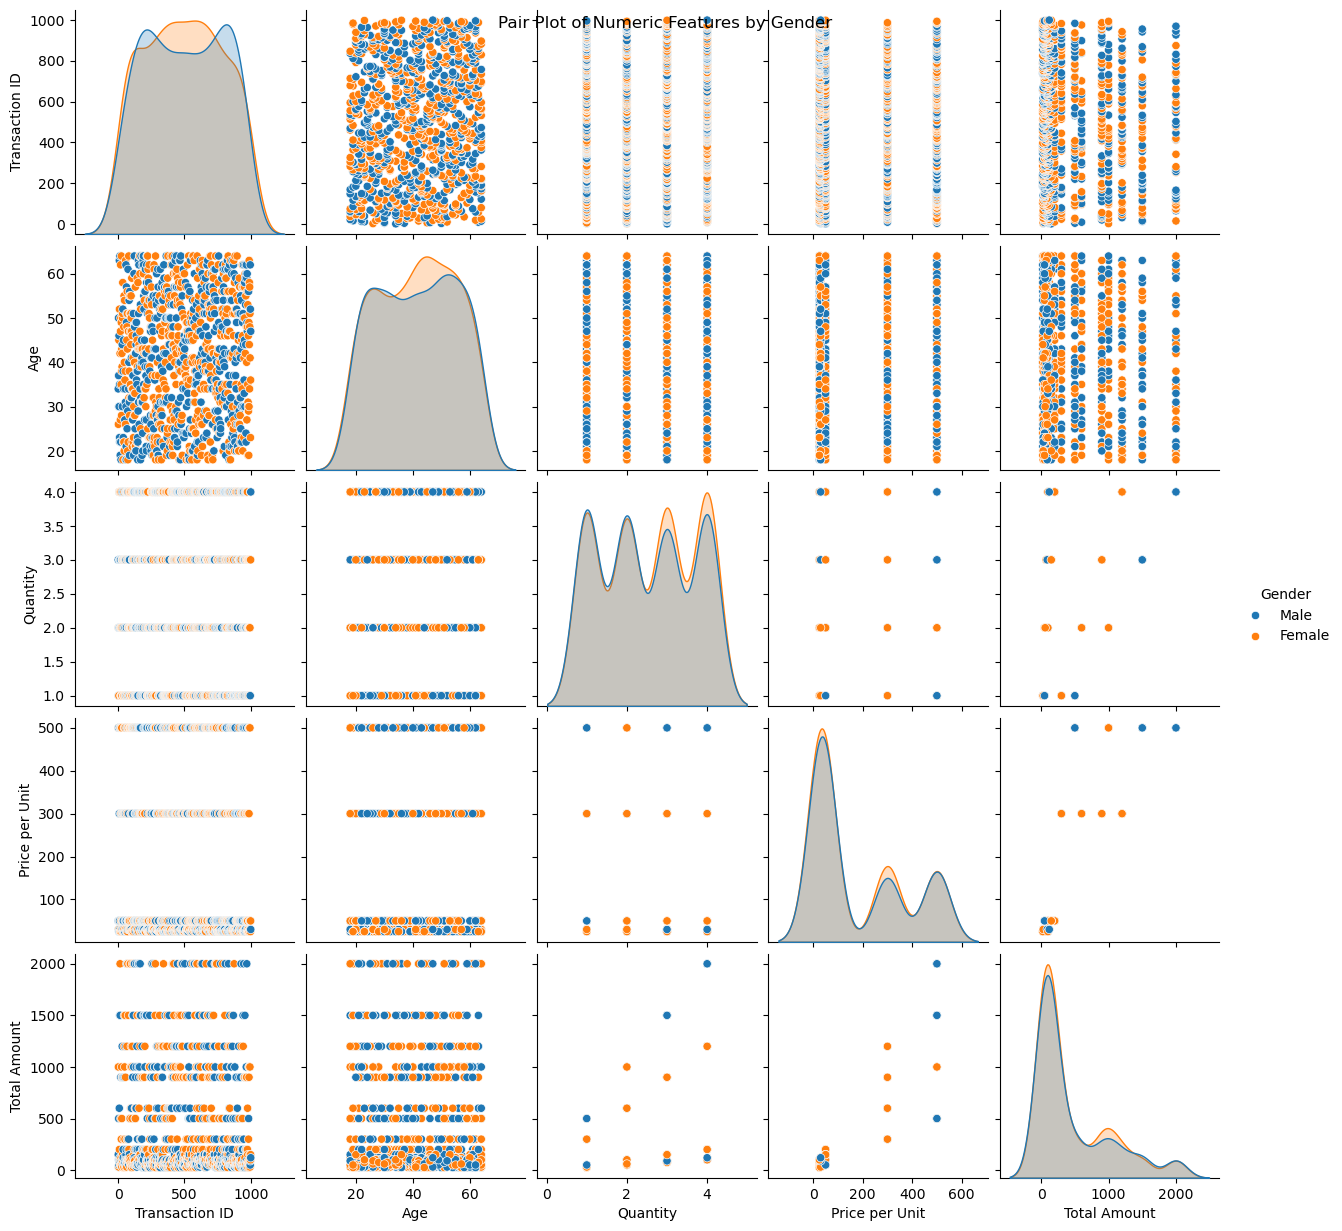

In [8]:
# Select relevant numeric columns plus a categorical column for hue
cols = ['Age', 'Quantity', 'Price per Unit', 'Total Amount']
sns.pairplot(df, hue='Gender',)
plt.suptitle('Pair Plot of Numeric Features by Gender')
plt.show()


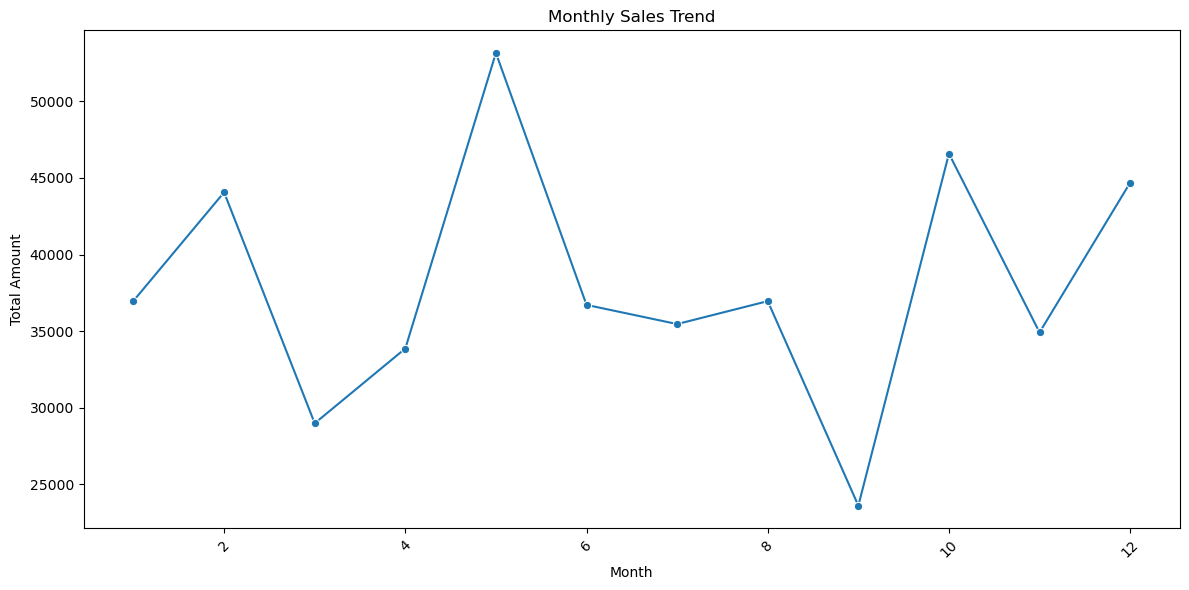

In [10]:
monthly_sales = df.groupby('Month')['Total Amount'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales, x='Month', y='Total Amount', marker='o')
plt.title('Monthly Sales Trend')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [21]:
df.describe().to_csv("summary_statistics.csv")

In [22]:
# Save the cleaned dataset (optional, but good for Power BI import)
df.to_csv('cleaned_retail_sales_data.csv', index=False)
print("\nCleaned data saved to 'cleaned_retail_sales_data.csv'")


Cleaned data saved to 'cleaned_retail_sales_data.csv'
